In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('tendulkar_tests.xlsx')

In [4]:
df

,Inning,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start DateAscending
0,1,15,28,24,2,0,62.5,6,bowled,2,v Pakistan,Karachi,1989-11-15
1,2,59,254,172,4,0,34.3,6,lbw,1,v Pakistan,Faisalabad,1989-11-23
2,3,8,24,16,1,0,50,6,run out,3,v Pakistan,Faisalabad,1989-11-23
3,4,41,124,90,5,0,45.55,7,bowled,1,v Pakistan,Lahore,1989-12-01
4,5,35,74,51,5,0,68.62,6,lbw,1,v Pakistan,Sialkot,1989-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,325,21,71,23,2,0,91.3,4,run out,4,v Australia,Mohali,2013-03-14
325,326,32,99,53,5,0,60.37,4,lbw,2,v Australia,Delhi,2013-03-22
326,327,1,8,5,0,0,20,4,lbw,4,v Australia,Delhi,2013-03-22
327,328,10,41,24,2,0,41.66,4,lbw,2,v West Indies,Eden Gardens,2013-11-06


In [5]:
# Filtering the DataFrame to include data up to the 50th inning
df_up_to_50th_inning = df[df['Inning'] <= 50]

# Calculating the total runs scored up to the 50th inning
total_runs_up_to_50th_inning = df_up_to_50th_inning['Runs'].sum()

# Calculating the total dismissals up to the 50th inning
total_dismissals_up_to_50th_inning = (df_up_to_50th_inning['Dismissal'] != 'not out').sum()

# Calculating the batting average after 50 innings
batting_average_after_50th_inning = total_runs_up_to_50th_inning / total_dismissals_up_to_50th_inning

print("Batting average after 50 innings:", batting_average_after_50th_inning)

Batting average after 50 innings: 53.666666666666664


In [6]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterating through innings in increments of 50
for start_inning in range(1, df['Inning'].max() + 1, 50):
    end_inning = start_inning + 49  # Calculate the end inning for the range
    
    # Filtering the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculating the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Appending the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Creating a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

print("Sachin Tendulkar's batting averages by intervals of 50 innings")
print(averages_table)


Sachin Tendulkar's batting averages by intervals of 50 innings
  Inning Range  Batting Average
0         1-50        53.666667
1       51-100        55.369565
2      101-150        66.068182
3      151-200        54.454545
4      201-250        41.933333
5      251-300        65.818182
6      301-350        31.178571


In [7]:
# Create an empty list to store the batting averages
averages_by_range = []

# Iterate through innings in increments of 25
for start_inning in range(1, df['Inning'].max() + 1, 25):
    end_inning = start_inning + 24  # Calculate the end inning for the range
    
    # Filter the DataFrame for matches within the current range
    df_range = df[(df['Inning'] >= start_inning) & (df['Inning'] <= end_inning)]
    
    # Calculate the average for the current range
    total_runs = df_range['Runs'].sum()
    total_dismissals = (df_range['Dismissal'] != 'not out').sum()
    
    # Avoid division by zero errors
    if total_dismissals > 0:
        average = total_runs / total_dismissals
    else:
        average = 0.0
    
    # Append the average to the list
    averages_by_range.append({
        'Inning Range': f"{start_inning}-{end_inning}",
        'Batting Average': average
    })

# Create a DataFrame from the list of averages
averages_table = pd.DataFrame(averages_by_range)

# Display the table
print(averages_table)


   Inning Range  Batting Average
0          1-25        41.565217
1         26-50        66.318182
2         51-75        40.000000
3        76-100        70.739130
4       101-125        69.238095
5       126-150        63.173913
6       151-175        42.250000
7       176-200        69.100000
8       201-225        38.434783
9       226-250        45.590909
10      251-275        74.136364
11      276-300        57.500000
12      301-325        31.500000
13      326-350        29.250000


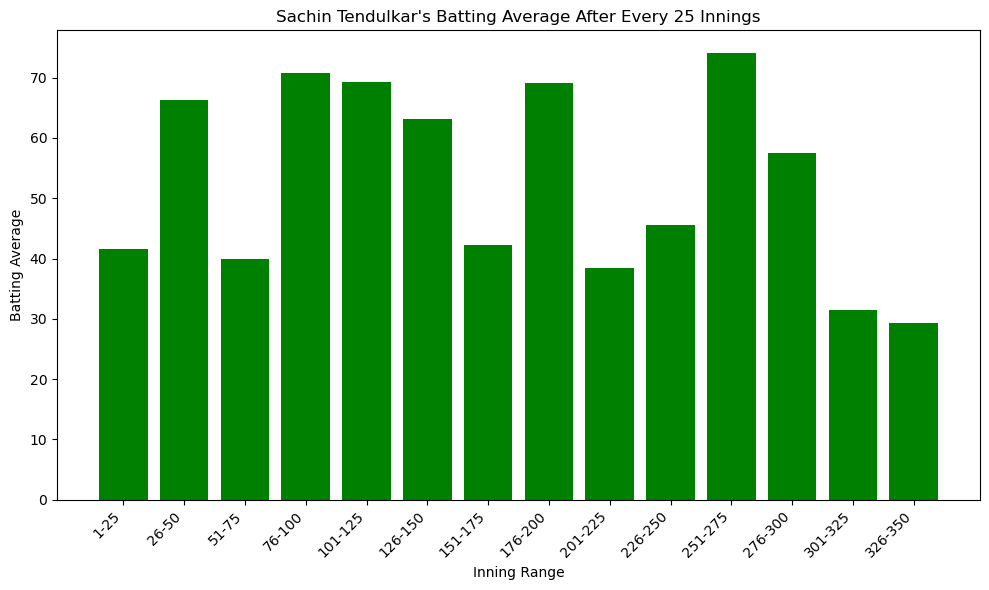

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(averages_table['Inning Range'], averages_table['Batting Average'], color='green')
plt.title("Sachin Tendulkar's Batting Average After Every 25 Innings")
plt.xlabel("Inning Range")
plt.ylabel("Batting Average")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()

    Inning   Runs
0       25    956
1       50   2415
2       75   3335
3      100   4962
4      125   6416
5      150   7869
6      175   8883
7      200  10265
8      225  11149
9      250  12152
10     275  13783
11     300  15048
12     325  15804


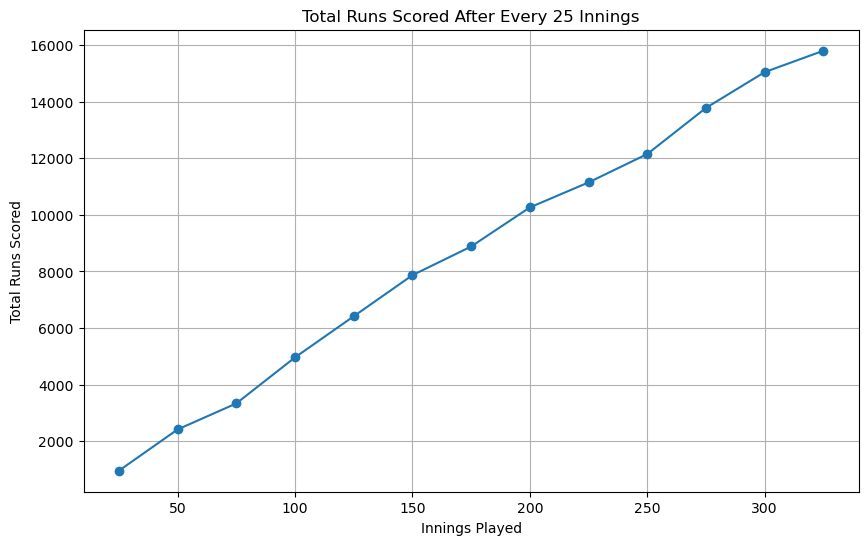

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the innings and total runs
innings_played = []
total_runs_scored = []

# Initializing variables for the cumulative sum
cumulative_runs = 0
innings_counter = 0

# Iterating through the DataFrame to calculate total runs after every 25 innings
for index, row in df.iterrows():
    innings_counter += 1
    cumulative_runs += row['Runs']
    
    # Check if 25 innings have been completed
    if innings_counter % 25 == 0:
        innings_played.append(innings_counter)
        total_runs_scored.append(cumulative_runs)

# Creating a DataFrame from the lists
totals_df = pd.DataFrame({'Inning': innings_played, 'Runs': total_runs_scored})

print(totals_df)

# Creating a line graph to visualize total runs scored after every 25 innings
plt.figure(figsize=(10, 6))
plt.plot(totals_df['Inning'], totals_df['Runs'], marker='o', linestyle='-')
plt.title("Total Runs Scored After Every 25 Innings")
plt.xlabel("Innings Played")
plt.ylabel("Total Runs Scored")
plt.grid(True)
plt.show()


   Innings Interval  Runs
0              1-25   956
1             26-50  1459
2             51-75   920
3            76-100  1627
4           101-125  1454
5           126-150  1453
6           151-175  1014
7           176-200  1382
8           201-225   884
9           226-250  1003
10          251-275  1631
11          276-300  1265
12          301-325   756


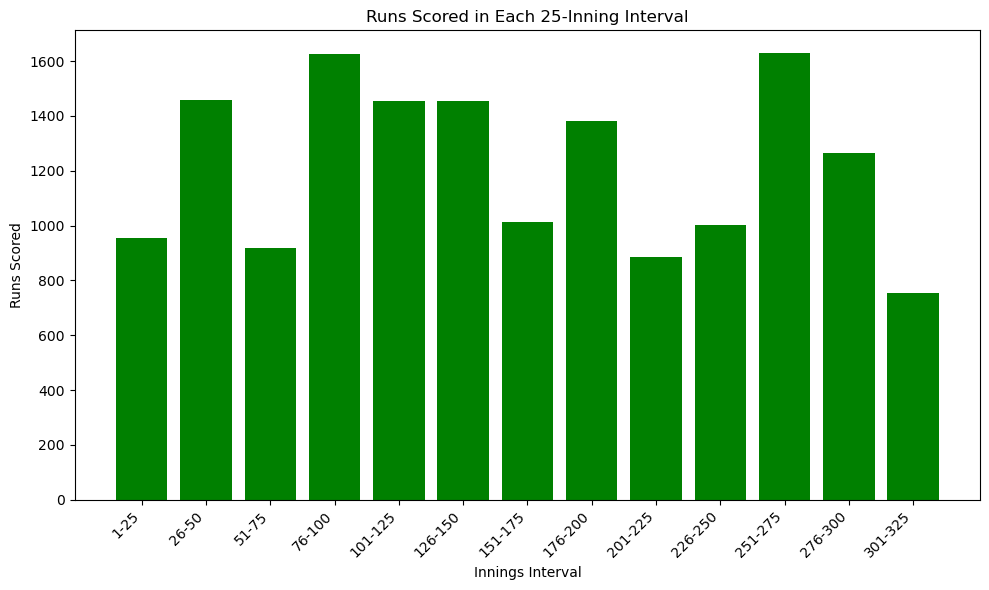

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating empty lists to store the intervals and runs scored in each interval
innings_intervals = []
runs_in_interval = []

# Initializing variables for tracking the interval
interval_start = 1
interval_end = 25
interval_runs = 0

# Iterating through the DataFrame to calculate runs scored in each 25-inning interval
for index, row in df.iterrows():
    innings_played = row['Inning']
    runs_scored = row['Runs']
    
    if innings_played >= interval_start and innings_played <= interval_end:
        interval_runs += runs_scored
    
    # Check if 25 innings have been completed
    if innings_played == interval_end:
        innings_intervals.append(f"{interval_start}-{interval_end}")
        runs_in_interval.append(interval_runs)
        
        # Update interval variables
        interval_start = interval_end + 1
        interval_end += 25
        interval_runs = 0

# Creating a DataFrame from the lists
interval_df = pd.DataFrame({'Innings Interval': innings_intervals, 'Runs': runs_in_interval})

print(interval_df)

plt.figure(figsize=(10, 6))
plt.bar(interval_df['Innings Interval'], interval_df['Runs'], color='green')
plt.title("Runs Scored in Each 25-Inning Interval")
plt.xlabel("Innings Interval")
plt.ylabel("Runs Scored")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
